In [19]:
import os 
import pandas as pd 
import bamboolib as bam 
import plotly.express as px 
import plotly.graph_objects as go 
from contextlib import contextmanager

In [20]:
bam.enable()

Success: the bamboolib extension was enabled successfully. You can disable it via 'bam.disable()'. You will now see a magic bamboolib button when you display your dataframes, for example via 'df'


In [21]:
@contextmanager
def change_path(path) : 
    import os
    prev_cwd = os.getcwd()
    print(os.getcwd())
    os.chdir('..')
    os.chdir(f'data/{path}')
    print(os.getcwd())
    try : 
        yield
    finally : 
        os.chdir(prev_cwd) 

In [22]:
with change_path('ready_to_process_data') : 
    data = pd.read_csv('prepare_for_eda.csv')

E:\DATA SCIENCE\airtraffic_forecast\airtraffic_forecast\notebook
E:\DATA SCIENCE\airtraffic_forecast\airtraffic_forecast\data\ready_to_process_data


In [23]:
passanger_total_period = data.groupby(['Period']).agg(**{'Passenger Count_sum': ('Passenger Count', 'sum')}).reset_index()
passanger_total_period

,Period,Passenger Count_sum
0,2005-07-01,3225769
1,2005-08-01,3195866
2,2005-09-01,2740553
3,2005-10-01,2770715
4,2005-11-01,2617333
...,...,...
124,2015-11-01,4013814
125,2015-12-01,4129052
126,2016-01-01,3748529
127,2016-02-01,3543639


In [24]:
data_geo_summary_group = data.groupby(['GEO Summary']).agg(**{'Passenger Count_sum': ('Passenger Count', 'sum')}).reset_index()
data_geo_summary_group

,GEO Summary,Passenger Count_sum
0,Domestic,338141001
1,International,100671499


In [25]:
passanger_count_group_period = data.groupby(['Period']).agg(**{'Passenger Total': ('Passenger Count', 'sum')}).reset_index()
passanger_count_group_period

,Period,Passenger Total
0,2005-07-01,3225769
1,2005-08-01,3195866
2,2005-09-01,2740553
3,2005-10-01,2770715
4,2005-11-01,2617333
...,...,...
124,2015-11-01,4013814
125,2015-12-01,4129052
126,2016-01-01,3748529
127,2016-02-01,3543639


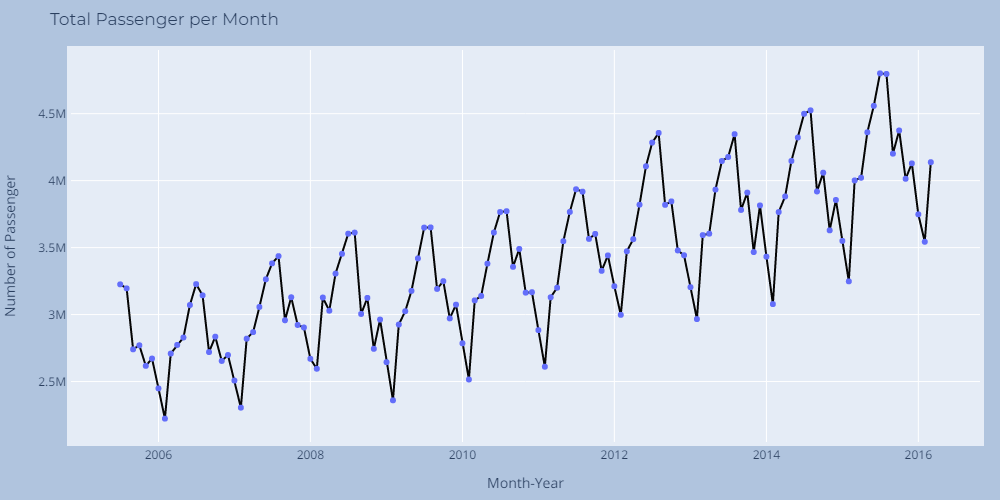

In [26]:
import plotly.graph_objects as go
fig1 = px.line(passanger_count_group_period.sort_values(by=['Period'], ascending=[True]), x='Period', y='Passenger Total', title='Total Passenger Monthly', template='seaborn')
fig2 = px.scatter(passanger_count_group_period, x='Period', y='Passenger Total', title='Total Passenger Monthly', template='plotly_white')
fig1.update_traces(line=dict(color = '#050505'))
fig2.update_traces(line=dict(color = '#050505'))
compiled_figure = go.Figure(data=fig1.data + fig2.data)

compiled_figure.update_layout(
                                title = 'Total Passenger per Month' , title_font_family='montserrat',title_xanchor='left',
    width=1000,height=500,
    margin=dict(
        l=20,
        r=20,
        b=30,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue"
)
compiled_figure.update_xaxes(title_text='Month-Year')
compiled_figure.update_yaxes(title_text='Number of Passenger')
compiled_figure.show("png")

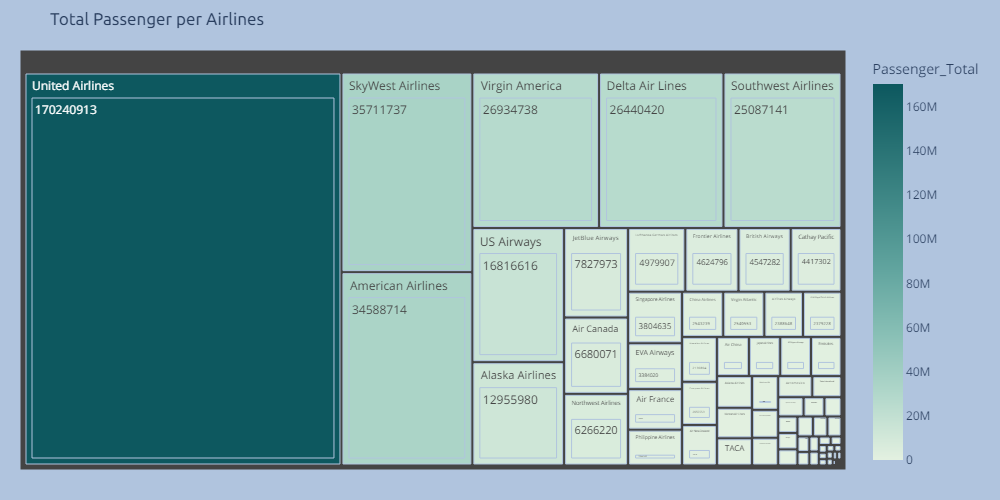

In [27]:
passanger_count_group_airlines = data.groupby(['Operating Airline']).agg(**{'Passenger_Total': ('Passenger Count', 'sum')}).reset_index()

fig_airlines = px.treemap(passanger_count_group_airlines, path=['Operating Airline', 'Passenger_Total'], 
                          branchvalues='total', color='Passenger_Total', 
                          color_continuous_scale='mint', values='Passenger_Total')

fig_airlines.update_layout(
                                title = 'Total Passenger per Airlines' , title_font_family='Ubuntu',title_xanchor='left',
    width=1000,height=500,
    margin=dict(
        l=20,
        r=20,
        b=30,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue"
)


fig_airlines.show("png")

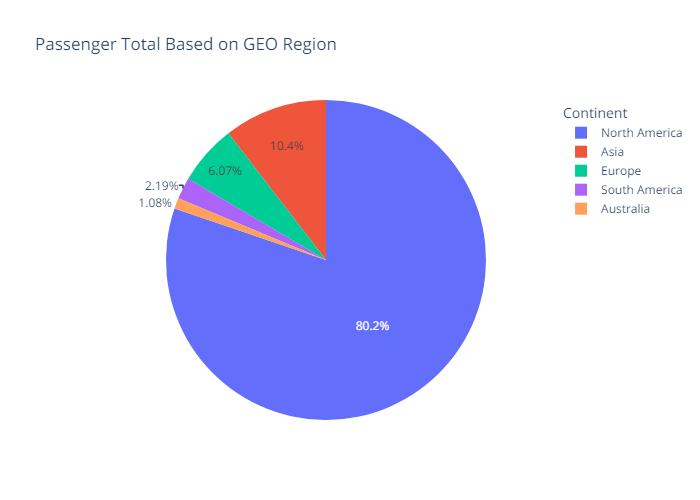

In [28]:
passanger_count_group_region = data.groupby(['GEO Region']).agg(**{'Passenger_Total': ('Passenger Count', 'sum')}).reset_index()
passanger_count_group_region_fig = px.pie(passanger_count_group_region, values='Passenger_Total', names='GEO Region', hover_data=['GEO Region'], title='Passenger Total Based on GEO Region')
passanger_count_group_region_fig.update_layout(legend_title_text='Continent')
passanger_count_group_region_fig.show('png')